#    THE SPARK FOUNDATION : DATA SCIENCE AND BUSINESS ANALYTICS

# Task 1 : <b> Prediction using the Supervised Machine Learning
    
**AIM :** predicting the percentage of the student based on the no of study hour

**Langauge :** Pyhton 3

**IDE :** Jupyter Notebook

**Type :** Linear Regression

**Author :** B.VARSHINI


### Steps to be followed :

***step1 :** Import the dataset

***step2 :** Visualize and Analyze the dataset

***step3 :** Prepare the data

***step4 :** Design and Train the Machine Learning model

***step5 :**  Visualize the model
 
***step6 :**  Make Predictions

***step7 :**  Evaluate the Model

 
 

# step 1 : Import the dataset

In [25]:
#importing all the required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# Reading data from remote link
url = "http://bit.ly/w-data"
student_data = pd.read_csv(url)

In [27]:
print("Data imported successfully")
student_data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [28]:
student_data.shape

#here we can see there are 25 rows and 2 columns in the student dataset

(25, 2)

In [29]:
student_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [30]:
student_data.isnull().sum()

#here we can see that there is no NULL values in the dataset that can affect the training of our algorithm

Hours     0
Scores    0
dtype: int64

# Step 2 : Visualize and Analyze the dataset

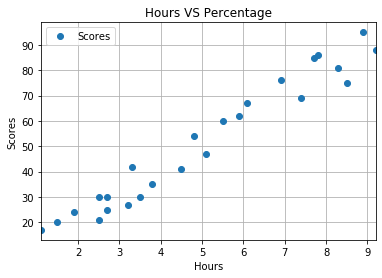

In [31]:
# plotting the distribution of scores and  number of hours studied on a 2D graph

student_data.plot(x = "Hours" , y = "Scores" , style = "o")
plt.title("Hours VS Percentage")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.grid()
plt.show()

From the above graph we can see that there is positive Linear Relatuonship between hours and percentage which means that as the number of hours increased , the percentage is also increased.

# step 3 : Prepare the data

In [32]:
#we are extracting the values of hours into the varaible x and the values of scores into the variable y

x = student_data.iloc[:, :-1].values
y = student_data.iloc[:, 1].values

In [33]:
#number of hours studies
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [34]:
#scores obtained
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

#### we now split the data into train and test datasets using scikit's learn built-in train_test_split()

In [35]:
from sklearn.model_selection import train_test_split
x_train , x_test ,  y_train , y_test = train_test_split(x , y ,test_size = 0.2 , random_state = 0)

In [36]:
x_train

array([[3.8],
       [1.9],
       [7.8],
       [6.9],
       [1.1],
       [5.1],
       [7.7],
       [3.3],
       [8.3],
       [9.2],
       [6.1],
       [3.5],
       [2.7],
       [5.5],
       [2.7],
       [8.5],
       [2.5],
       [4.8],
       [8.9],
       [4.5]])

In [37]:
x_test

array([[1.5],
       [3.2],
       [7.4],
       [2.5],
       [5.9]])

In [38]:
y_train

array([35, 24, 86, 76, 17, 47, 85, 42, 81, 88, 67, 30, 25, 60, 30, 75, 21,
       54, 95, 41], dtype=int64)

In [39]:
y_test

array([20, 27, 69, 30, 62], dtype=int64)

# step 4 : Design and Train the Machine Learning model

In [40]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

print("Training completed")

Training completed


# Step5 : Visualize the model

<function matplotlib.pyplot.show(*args, **kw)>

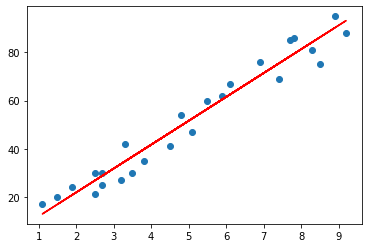

In [41]:
#plotting the regression line
line = regressor.coef_*x+regressor.intercept_

#plotting the test data

plt.scatter(x,y)
plt.plot(x,line,color="red")
plt.show    

# Step6 : Make Predictions


In [42]:
print(x_test) #test data of hours

y_pred = regressor.predict(x_test)  # predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


#### comparing Actual VS Prediction

In [44]:
df = pd.DataFrame({'Actual':y_test , 'Predicted':y_pred})

In [43]:
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [45]:
# testing the custom data of 9.25 hrs/day

Hours = 9.25
own_pred = regressor.predict([[Hours]])
print("No of Hours :",Hours)
print("prediction score : " , own_pred)

No of Hours : 9.25
prediction score :  [93.69173249]


# Step7 : Evaluate the Model

#### it is important to evaluate the performance of the model to compare how well the different algorithms perform on a particular dataset

## Mean Abosulte Error

In [22]:
from sklearn import metrics

print("Mean Absolute Error is :",metrics.mean_absolute_error(y_test,y_pred))

Mean Absolute Error is : 4.183859899002975


## Max Error

In [23]:
print("Max Error is :",metrics.max_error(y_test,y_pred))

Max Error is : 6.732260779489842


## Mean Squared Error

In [24]:
print("Mean Squared Error is :",metrics.mean_squared_error(y_test,y_pred))

Mean Squared Error is : 21.5987693072174


## CONCLUSION :

###  We have predicted that if student studies 9.25 Hours then the Student will secure 93.69 Marks